# Pooled Cross Sectional Analysis (Second Example)

### Intro and objectives


### In this lab you will learn:
1. examples of pooled cross sectional analysis
2. how to fit pooled cross sectional models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit pooled cross sectional data
* Worked Examples
* How to interpret the results obtained

In [11]:
!pip install wooldridge
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Example. Changes in the Return to Education and the Gender Wage Gap

#### the variables in the data include years of education, experience, and gender. The variable union is a dummy variable equal to one if the person belongs to a union, and zero otherwise. The variable y85 is a dummy variable equal to one if the observation comes from 1985 and zero if it comes from 1978. There are 550 people in the sample in 1978 and a different set of 534 people in 1985.

#### In this case we fit a multiple linear models to predict log(wage)


$ log(wage)=\beta_0+δ_o*year_{85}+\beta_1*educ+δ_1*year_{85}*educ+\beta_2*exper+\beta_2*exper^2+\beta_4*union+beta_5*female+δ_5*year_{85}*female $



In [3]:
cps78_85 = woo.dataWoo('cps78_85')

In [4]:
cps78_85.head()

,educ,south,nonwhite,female,married,exper,expersq,union,lwage,age,year,y85,y85fem,y85educ,y85union
0,12,0,0,0,0,8,64,0,1.2150,25,78,0,0,0,0
1,12,0,0,1,1,30,900,1,1.6094,47,78,0,0,0,0
2,6,0,0,0,1,38,1444,1,2.1401,49,78,0,0,0,0
3,12,0,0,0,1,19,361,1,2.0732,36,78,0,0,0,0
4,12,0,0,0,1,11,121,0,1.6490,28,78,0,0,0,0


In [6]:
type(cps78_85)

pandas.core.frame.DataFrame

In [21]:
# We impose a simple, linear, model: 
# We specify CeoSalaries as the empirical dataset

# OLS results including interaction terms:
reg = smf.ols(formula='lwage ~ y85+educ+y85*educ + exper +I(exper**2) + union+female+y85*female',
              data=cps78_85)

In [22]:
# We fit the model
results = reg.fit()


In [23]:
# print regression table:
table = pd.DataFrame({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

table: 
                    b      se        t    pval
Intercept      0.4589  0.0934   4.9111  0.0000
y85            0.1178  0.1238   0.9517  0.3415
educ           0.0747  0.0067  11.1917  0.0000
y85:educ       0.0185  0.0094   1.9735  0.0487
exper          0.0296  0.0036   8.2932  0.0000
I(exper ** 2) -0.0004  0.0001  -5.1513  0.0000
union          0.2021  0.0303   6.6722  0.0000
female        -0.3167  0.0366  -8.6482  0.0000
y85:female     0.0851  0.0513   1.6576  0.0977



## Based on the previous we have fitted the following model:

$ log(wage)=0.45+0.1178*year_{85}+0.0747*educ+0.0185*year_{85}*educ+0.03*exper+0.0004*exper^2+0.2*union-0.32*female+0.085*year_{85}*female $

## How do we interpret the equation?

#### Based on the fitted model, we conclude:

####1. The return to education in 1978 is 0.0747, that is 7.5%
####2. The return to education in 1985 is 0.0747+0.0185=0.0932, that is 9.3%

#### 3. In 1978, other things equal, a woman earned -0.32, that is 32% less than a man

#### 4. In 1985 a woman earned about -0.32+0.085=-0.235, that is 23% less than a man

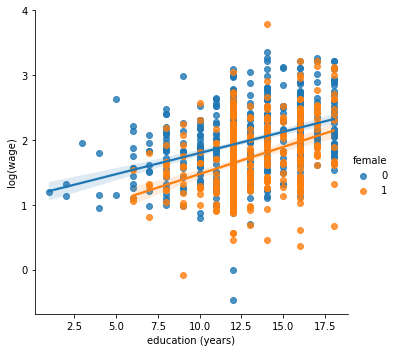

In [25]:
g = sns.lmplot(
    data=cps78_85,
    x="educ", y="lwage", hue="female",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("education (years)", "log(wage)")